In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from pandas_datareader import data as wb
%matplotlib inline

In [5]:
stocks = ['BRITANNIA.NS', 'BHARTIARTL.NS', 'ULTRACEMCO.NS', 'DRREDDY.NS', 'M&M.NS', 'INFY.NS', 'HINDUNILVR.NS', 'GRASIM.NS', 'LT.NS', 'TECHM.NS']
data = pd.DataFrame()

for i in stocks:
    data[i] = wb.DataReader(i, data_source = 'yahoo', start = '2010-1-1', end = '2019-12-31')['Adj Close']

In [6]:
data.tail()

,BRITANNIA.NS,BHARTIARTL.NS,ULTRACEMCO.NS,DRREDDY.NS,M&M.NS,INFY.NS,HINDUNILVR.NS,GRASIM.NS,LT.NS,TECHM.NS
Date,,,,,,,,,,
2019-12-24,3057.177734,457.149994,4097.350098,2895.949951,527.500000,733.400024,1946.400024,738.500000,1283.031616,761.678528
2019-12-26,3028.742676,447.549988,4062.750000,2865.600098,528.349976,728.950012,1944.949951,736.750000,1261.631348,760.050781
2019-12-27,3008.764160,455.100006,4055.600098,2897.600098,530.150024,736.950012,1949.900024,739.750000,1281.650879,769.719116
2019-12-30,3013.956543,460.500000,4051.949951,2888.850098,536.900024,732.900024,1937.250000,736.750000,1284.313721,772.185486
2019-12-31,2994.620850,455.799988,4046.050049,2874.550049,531.549988,731.150024,1923.000000,743.650024,1280.270264,752.059509


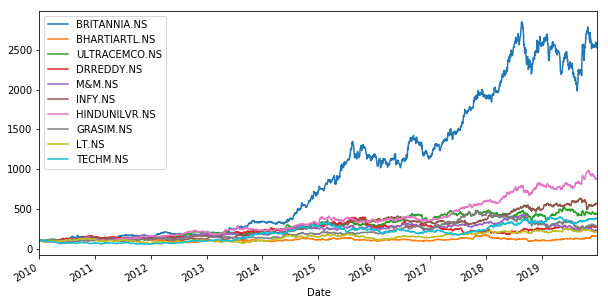

In [7]:
(data / data.iloc[0] * 100).plot(figsize=(10, 5))

In [8]:
log_returns = np.log(data / data.shift(1))

In [9]:
log_returns.cov()

,BRITANNIA.NS,BHARTIARTL.NS,ULTRACEMCO.NS,DRREDDY.NS,M&M.NS,INFY.NS,HINDUNILVR.NS,GRASIM.NS,LT.NS,TECHM.NS
BRITANNIA.NS,0.000273,0.000035,0.000051,0.000031,0.000053,0.000023,0.000056,0.000046,0.000062,0.000048
BHARTIARTL.NS,0.000035,0.000399,0.000078,0.000031,0.000082,0.000041,0.000039,0.000084,0.000098,0.000038
ULTRACEMCO.NS,0.000051,0.000078,0.000279,0.000036,0.000092,0.000029,0.000043,0.000138,0.000113,0.000045
DRREDDY.NS,0.000031,0.000031,0.000036,0.000267,0.000047,0.000034,0.000038,0.000045,0.000044,0.000045
M&M.NS,0.000053,0.000082,0.000092,0.000047,0.000313,0.000043,0.000055,0.000097,0.000126,0.000055
INFY.NS,0.000023,0.000041,0.000029,0.000034,0.000043,0.000303,0.000025,0.000016,0.000053,0.000108
HINDUNILVR.NS,0.000056,0.000039,0.000043,0.000038,0.000055,0.000025,0.000210,0.000037,0.000048,0.000029
GRASIM.NS,0.000046,0.000084,0.000138,0.000045,0.000097,0.000016,0.000037,0.000299,0.000111,0.000054
LT.NS,0.000062,0.000098,0.000113,0.000044,0.000126,0.000053,0.000048,0.000111,0.000317,0.000065
TECHM.NS,0.000048,0.000038,0.000045,0.000045,0.000055,0.000108,0.000029,0.000054,0.000065,0.000351


In [10]:
#weights = np.zeros(len(stocks)*simulations).reshape(simulations, len(stocks))
#weights

#weights[2, :] = np.random.random(len(stocks))
#weights[2, :], np.sum(weights[2, :])

In [11]:
simulations = 50000
Expected_return = np.zeros(simulations)
Expected_vol = np.zeros(simulations)
weights = np.zeros(len(stocks)*simulations).reshape(simulations, len(stocks))


for i in range (simulations):
    
    weights[i, :] = np.random.random(len(stocks))
    weights[i, :] = weights[i, :]/np.sum(weights[i, :])
    
    Expected_return[i] = np.sum(weights[i, :] * log_returns.mean()) * 250
       
    Expected_vol[i] = np.sqrt(np.dot(weights[i, :].T,np.dot(log_returns.cov() * 250, weights[i, :])))
    
Expected_return, Expected_vol    

(array([0.15867326, 0.16015578, 0.1461616 , ..., 0.16238999, 0.14056068,
        0.1562876 ]),
 array([0.15176472, 0.14917799, 0.1463736 , ..., 0.15508791, 0.14749486,
        0.13882651]))

In [12]:
portfolio_simul = pd.DataFrame({'Return-rate': Expected_return, 'Volatility':  Expected_vol})

for i in (stocks):
    portfolio_simul[i] = weights[:, stocks.index(i)]

In [13]:
portfolio_simul.head()

,Return-rate,Volatility,BRITANNIA.NS,BHARTIARTL.NS,ULTRACEMCO.NS,DRREDDY.NS,M&M.NS,INFY.NS,HINDUNILVR.NS,GRASIM.NS,LT.NS,TECHM.NS
0,0.158673,0.151765,0.132168,0.020921,0.086712,0.071725,0.056562,0.017588,0.202424,0.246027,0.111771,0.054101
1,0.160156,0.149178,0.173173,0.097534,0.154288,0.051529,0.002651,0.036510,0.122530,0.125181,0.139669,0.096934
2,0.146162,0.146374,0.137601,0.156757,0.027900,0.083099,0.162817,0.083295,0.148031,0.087811,0.084853,0.027835
3,0.142742,0.143279,0.070892,0.083202,0.157386,0.126748,0.112779,0.166973,0.070319,0.048497,0.045106,0.118099
4,0.158930,0.148511,0.071772,0.040061,0.064423,0.046159,0.226714,0.245968,0.200269,0.033756,0.015060,0.055820


Text(0, 0.5, 'Expected Return')

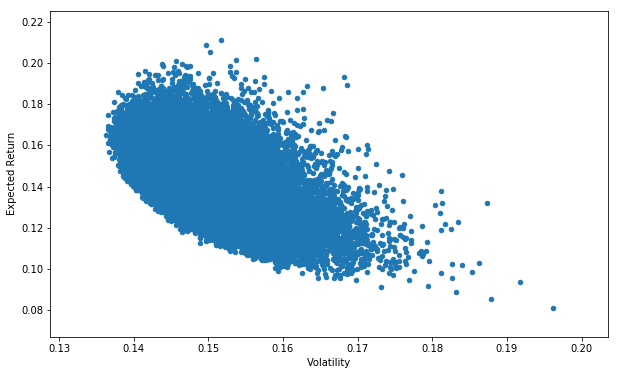

In [14]:
portfolio_simul.plot(x='Volatility', y='Return-rate', kind='scatter', figsize=(10, 6));
plt.xlabel('Volatility')
plt.ylabel('Expected Return')

In [15]:
risk_free = 0.067

In [16]:
sharpe = (Expected_return - risk_free)/Expected_vol

In [17]:
np.argmin(sharpe)

39803

In [18]:
weights[np.argmin(sharpe),:]

array([0.00785714, 0.3085476 , 0.02340699, 0.00554423, 0.20095751,
       0.02089983, 0.01289869, 0.1013504 , 0.30686625, 0.01167135])

In [19]:
opt_pfol = portfolio_simul.loc[((portfolio_simul['Return-rate'] - risk_free)/portfolio_simul['Volatility']).idxmax()]

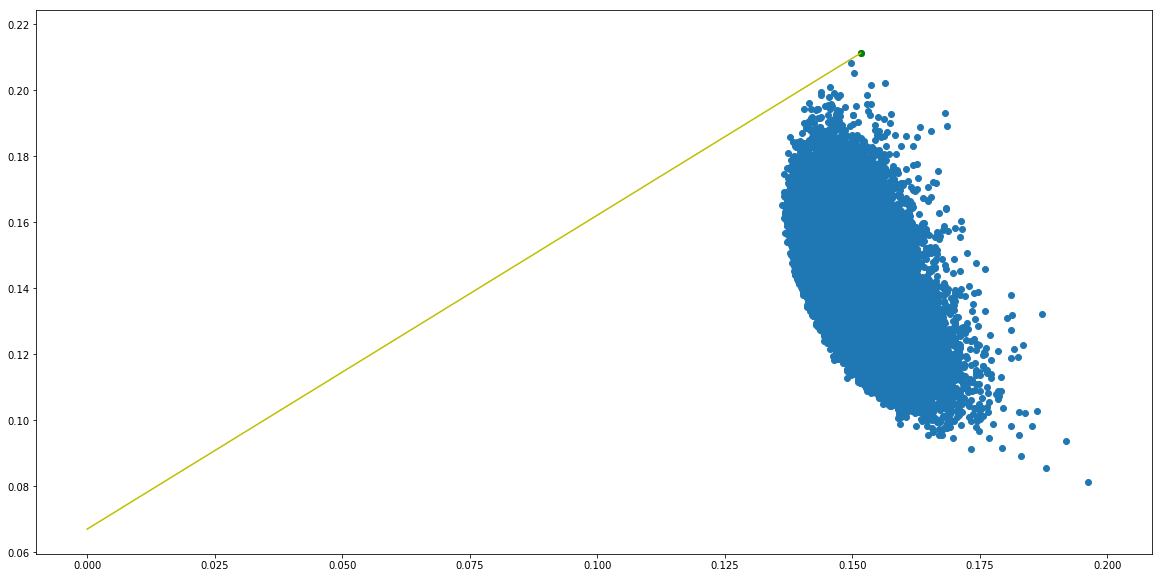

In [21]:
plt.subplots(figsize = (20, 10))

plt.scatter(portfolio_simul['Volatility'], portfolio_simul['Return-rate'])
plt.scatter(opt_pfol[1], opt_pfol[0], color = 'g')
#plt.scatter(0.1, 0.1, color = 'b')
plt.plot([0, opt_pfol[1]], [risk_free, opt_pfol[0]], color = 'y')
